<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Gr%C3%A1ficos%20/%20Previs%C3%A3o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Previsão para as Vendas de Dezembro de 2024

DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5pnon10/yfls67s2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5pnon10/bgjsq09i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21894', 'data', 'file=/tmp/tmpj5pnon10/yfls67s2.json', 'init=/tmp/tmpj5pnon10/bgjsq09i.json', 'output', 'file=/tmp/tmpj5pnon10/prophet_modelxpjbmyds/prophet_model-20250501132436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Saving Dados_29-04-25.xlsx to Dados_29-04-25 (1).xlsx


13:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Previsão de vendas diárias - Dezembro/2024:
             ds        yhat
1065 2024-12-01  429.357428
1066 2024-12-02  417.811812
1067 2024-12-03  420.926410
1068 2024-12-04  426.128512
1069 2024-12-05  430.681891
1070 2024-12-06  437.470244
1071 2024-12-07  445.421415
1072 2024-12-08  443.041102
1073 2024-12-09  432.719930
1074 2024-12-10  436.946290
1075 2024-12-11  443.112333
1076 2024-12-12  448.449503
1077 2024-12-13  455.812895
1078 2024-12-14  464.106286
1079 2024-12-15  461.816538
1080 2024-12-16  451.321241
1081 2024-12-17  455.101955
1082 2024-12-18  460.550460
1083 2024-12-19  464.904367
1084 2024-12-20  471.031384
1085 2024-12-21  477.854086
1086 2024-12-22  473.883904
1087 2024-12-23  461.528187
1088 2024-12-24  463.302744
1089 2024-12-25  466.637268
1090 2024-12-26  468.810029
1091 2024-12-27  472.731153
1092 2024-12-28  477.366364
1093 2024-12-29  471.269921
1094 2024-12-30  456.890648
1095 2024-12-31  456.783474


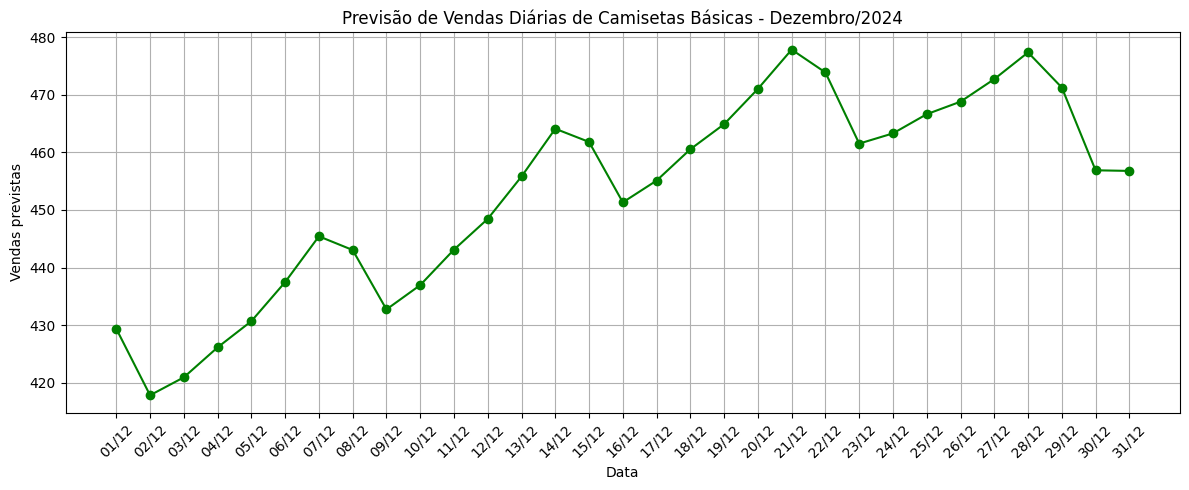

In [2]:
# Instala as bibliotecas necessárias (se ainda não estiverem no ambiente)
!pip install prophet openpyxl --quiet

# Importações
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Upload do arquivo no Colab
from google.colab import files
uploaded = files.upload()

# Lê o arquivo Excel
arquivo = list(uploaded.keys())[0]
df = pd.read_excel(arquivo)

# Converte colunas
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Camisetas_básicas_masculinas'] = pd.to_numeric(df['Camisetas_básicas_masculinas'], errors='coerce')

# Remove valores inválidos
df = df.dropna(subset=['Timestamp', 'Camisetas_básicas_masculinas'])

# Agrupa por data (soma diária)
df_diario = df.groupby('Timestamp')['Camisetas_básicas_masculinas'].sum().reset_index()
df_diario.columns = ['ds', 'y']  # renomeia para padrão Prophet

# Modelo Prophet
modelo = Prophet(daily_seasonality=True, weekly_seasonality=True)
modelo.fit(df_diario)

# Datas futuras até 31/12/2024
future = modelo.make_future_dataframe(periods=31)
future = future[future['ds'] <= '2024-12-31']

# Previsão
forecast = modelo.predict(future)

# Apenas dezembro/2024
previsao_dez = forecast[(forecast['ds'] >= '2024-12-01') & (forecast['ds'] <= '2024-12-31')][['ds', 'yhat']]

# Previsões em tabela
print("Previsão de vendas diárias - Dezembro/2024:")
print(previsao_dez)

# Gráfico com todos os dias no eixo X
plt.figure(figsize=(12, 5))
plt.plot(previsao_dez['ds'], previsao_dez['yhat'], marker='o', linestyle='-', color='green')
plt.title('Previsão de Vendas Diárias de Camisetas Básicas - Dezembro/2024')
plt.xlabel('Data')
plt.ylabel('Vendas previstas')
plt.grid(True)

# Mostra todas as datas no eixo X, no formato dd/mm
plt.xticks(previsao_dez['ds'], rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

plt.tight_layout()
plt.show()